# Machine Learning & Statistics Assessment 2019

This assignment is to analyse the well-known Boston Housing Dataset and is broken in to 3 sections which are also outlined and discussed in the readMe file contained in the GitHub repository for this project :

1) Describe:
    - Use descriptive statistics and plots to describe the Boston House Prices dataset
    
2) Infer:
    - Use inferentials statistics to analyse if there is a significant difference in median house prices between houses along the Charles river and those that are not.
    
3) Predict:
    - Create a neural network that can predict the median house price based on the other dataset variables 

_[1]_

In [134]:
# Importing libraries required for various analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

#Scipy
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

#Scikitlearn
from sklearn.datasets import load_boston
import sklearn.decomposition as dec
import sklearn.preprocessing as pre
import sklearn.model_selection as mod

#Keras
import keras as kr
from keras import models, layers

In [126]:
# Uses dataset preloaded in to scikit learn
# Reference - [2]

# Loads the dataset and assigns it to the variable name boston
boston = load_boston()

## Descriptive Statistics

The objective of this section is to use descriptive statistics and plots to describe the Boston House Prices dataset.

In [116]:
# Review the shape of the loaded dataset to determine if it has loaded correctly/as is expected
print(boston.data.shape)

(506, 13)


506 rows of data and 13 columns were the expected values from loading this dataset as the MEDV will be manually added later in the notebook, to the dataframe.

### Attribute information in column order for the dataset loaded - 

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000 dollars
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT Percentage lower status of the population
- MEDV Median value of owner-occupied homes in 1000’s dollars

(Details are taken from the DESCR function completed later in the dataset)

In [117]:
#Takes the attribute names taken from each column header within the data set to ensure those listed above as the expected attributes are listed, as noted previously MEDV is missing and will be added manually
attributes = boston.feature_names 
print(attributes)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


It can be seen from the printing of the column headers and the shape of the dataset that MEDV is currently not included in the loaded boston dataframe and will need to be added.

In [6]:
# Creates a dataframe to included loaded dataset and MEDV column which also includes the header row with the feature names
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
medv = df['MEDV'].copy()
del df['MEDV']
df = pd.concat((medv, df), axis=1)

In [12]:
#Gives an overview of the data included in the dataset, the attribute information and where the dataset has been resourced from
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
#Head overview of the dataset
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#Tail overview of the dataset
df.tail()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


The below function checks for any NULL values in any of the attribute columns in the dataset to see if data cleaning is required through removal of rows which may have data missing that would affect the analysis.

In [118]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [17]:
#Overview descriptive statistics for each of the attribute columns contained in the dataset in a table format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


As the attribute of main interest, or the target of the overall analysis, the description variables show the below regarding the MEDV value :
- The mean value is approximately 22,500 

- The max value in the dataset is 50,000
    - This seems to be a cap of the MEDV values measured which mayalso affect the analysis and it is possible that removing the data points which hit the max of 50,000 may improve the accuracy of the analysis.
    

- The min value in the dataset is 5,000

    - This shows there was a wide variety of house prices used in the original analysis with the gap of 45,000, if you take the apparent cap in to consideration

This analysis goes on to review the relationships between the MEDV value and the other attributes contained within the dataset.

In [18]:
#Checks the correlation coefficients to observe relationships between the attributes in the dataset
df.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


(14.0, 0.0)

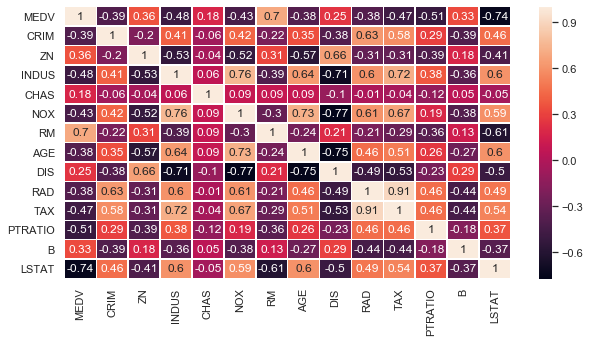

In [19]:
#Produces a heatmap to provide an easier view of the relationships to the above correlation co-efficient table produced
sns.set(rc={'figure.figsize':{10,5}})
data = df.corr().round(2)
mapAll = sns.heatmap(data, annot=True, linewidths=.5)
bottom, top = mapAll.get_ylim()
mapAll.set_ylim(bottom + 0.5, top - 0.5)

As the median house price is the target data in this analysis we will review the 5 variables which have the highest correlation coefficients and therefore appear to show that they have a relationship with the median house prices :

- LSTAT -> -0.74

- RM -> 0.7

- PTRATIO -> -0.51

- INDUS -> -0.48

- TAX -> -0.47



The RM attribute has the closest variance to 1, this typically means that as the MEDV value gets larger the RM variable would also become larger. In the case of this data set it seems to suggest that room number does in fact influence the median house price. One would assume that in general if a house tends to have more rooms it would in fact increase the value. However, this is not always the case and other factors could also influence the house price even with less rooms such as the area the house is located in. Due to this we must also remember that the correlation does not always indicate a reliance or relationship between the variables and this must be kept in mind during any analysis.

The remaining 4 variables (LSTAT, PRATIO, INDUS & TAX) all report a slight negative correlation values as per the information provided with the correlation coefficient calculation and the heat map generated. This typically suggests an inverse relationship between these variables and the median house prices. However, we must also be careful in making assumptions that the apparent relationship via this factor is indicative of a relationship and also could be due to some change as discussed in relation to the RM variable.

_[3]_

(6.0, 0.0)

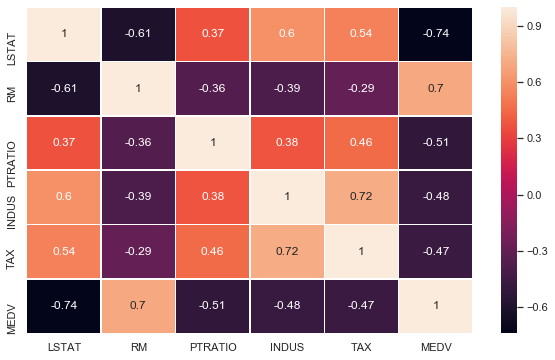

In [120]:
cols = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'MEDV']

#Re-do of correlation co-efficient heatmap for better visualisation of these chosen attributes for clarity
sns.set(rc={'figure.figsize':{10,6}})
data = df[cols].corr().round(2)
map = sns.heatmap(data, annot=True, linewidths=.5)
bottom, top = map.get_ylim()
map.set_ylim(bottom + 0.5, top - 0.5)

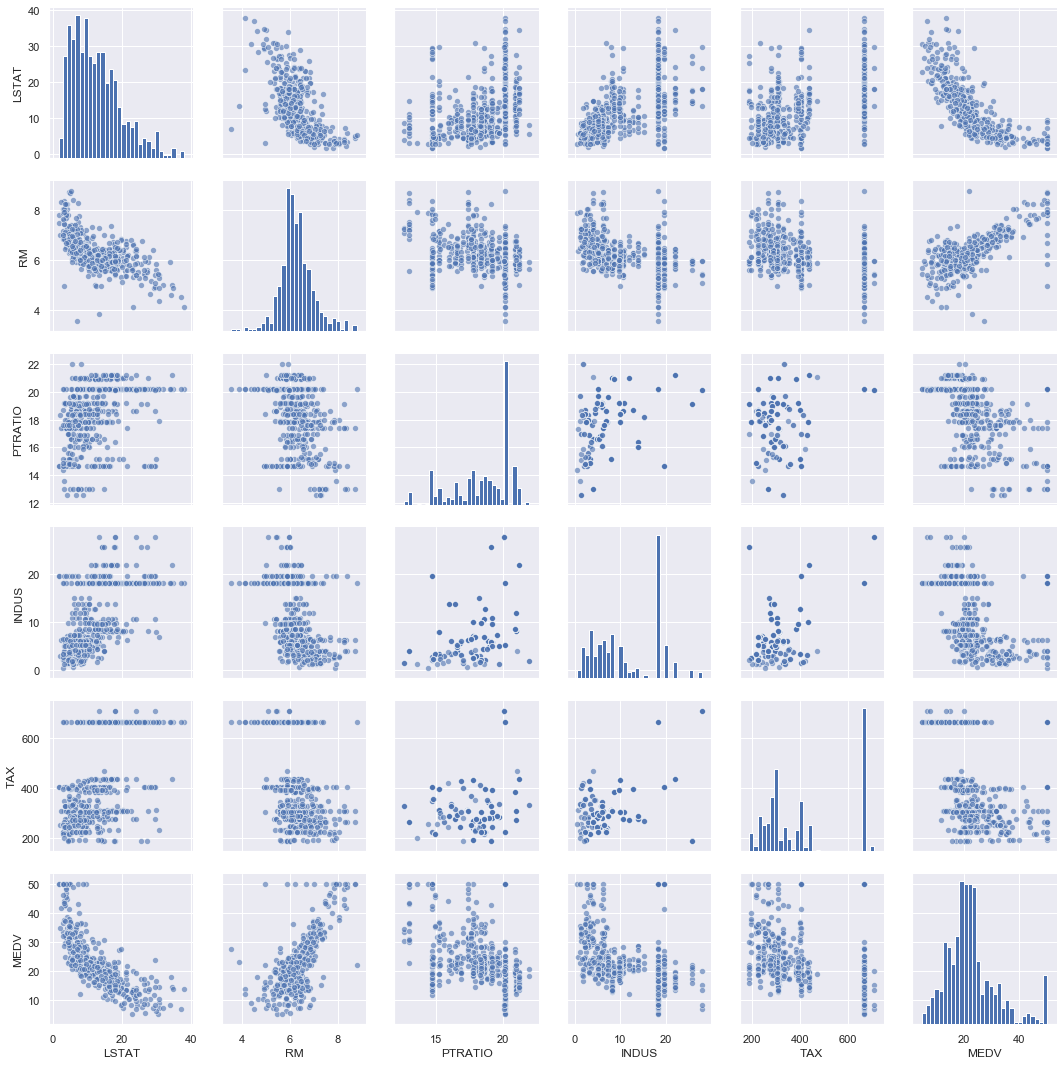

In [24]:
#Visualisation of attributes
sns.pairplot(df[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

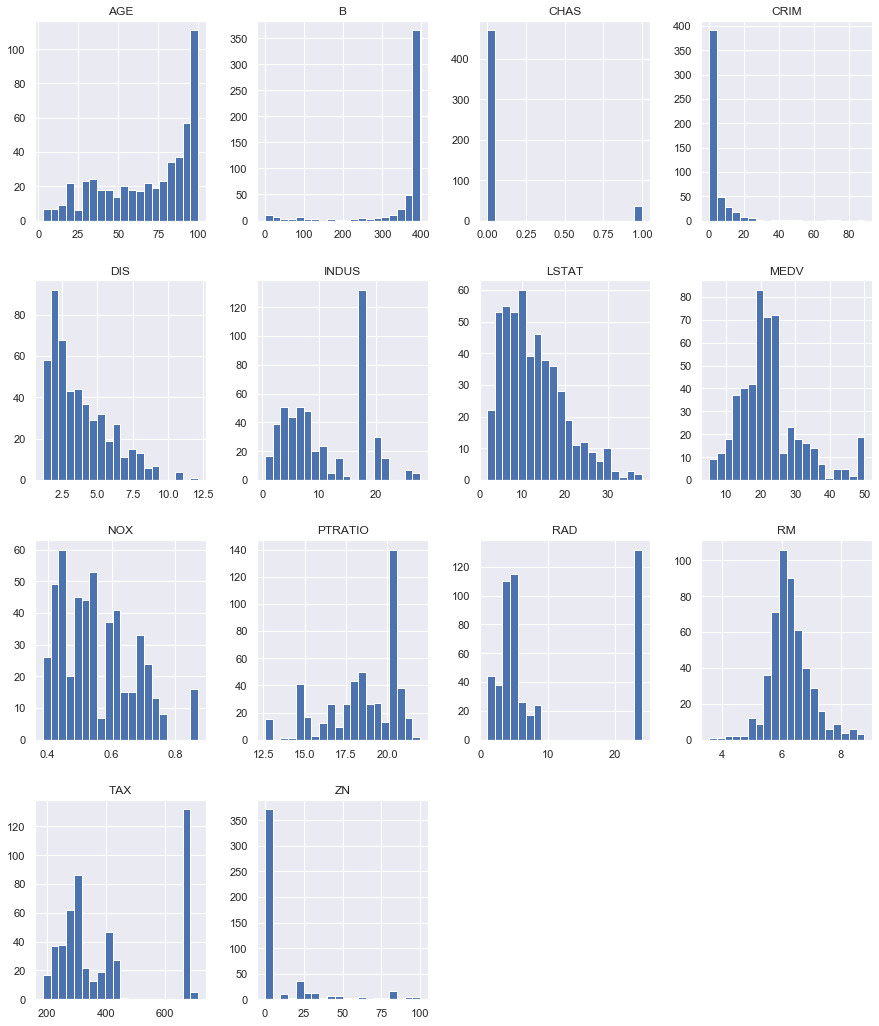

In [102]:
# Histogram visuals only of each of the attributes in the dataset

#df.hist(bins=20, figsize=(10,5))
df.hist(bins=20, figsize=(15,18))
plt.show()

The shape of the distributions of some of the attributes can also clearly be visualised via the above histogram plots:

- RM and MEDV columns appear closest to normal distributions in shape.
        
    - Normal distribution typically indivates a symmetry around the mean for those attributes, that the data points around the mean value have a higher frequency of occurring than data further away from the mean.
    

- CHAS, AGE, CRIM, DIS and LSTAT all appear skewed in shape
    
    - Right skewed distributions of the data usually indicate the following information :
        - mean > mode
        - median > mode
        - mean > median
        - The data is no longer symmetric around the mean   
   
   <br>
    - While a left skewness of the data is indicative of the opposite
   
While the RM attibute appears to be the most likely to fit a linear regressiong model in the above pairplot visualisation

## Inferential Statistics

The objective of this section is to use inferential statistics to analyse whether there is a significant difference in median house prices between houses along the Charles river and those that are not within the data set.

In [127]:
# Mean of overall Median House Price column
MEDV = df[['MEDV']]
MEDV_mean = np.mean(df[['MEDV']])
print(MEDV_mean)

MEDV    22.532806
dtype: float64


In order to determine if the CHAS variable has an affect on the median house prices we will break the dataset to only use these 2 attributes and again to create 2 dataframes. One dataframe will contain the MEDV values where the CHAS variable is 1, or is bound by the Charles river. While the second dataframe will contain the MEDV values where the CHAS variable is 0, and therefore not bound by the Charles river.

In [26]:
# Divides the MEDV in to 2 pandas Dataframes depending on CHAS variable value, 0 or 1
# CHAS=1 if tract bounds the river
# CHAS=0 if tract does not bound the river

#CHAS=1 dataframe
isBound = df['CHAS']==1
#Creates a dataframe from this selection of information
BoundDF = df[isBound]
#Checks the shape of the dataframe
print(BoundDF.shape)
#Prints the MEDV values where CHAS=1
#print(BoundDF['MEDV'])

(35, 14)


This output indicates there are 35 rows of data within the boston housing dataset that tract the Charles river

In [27]:
#Assigns the MEDV column in the bound dataset to the variable boundMEDV and checks the type is a dataframe 
boundMEDV = BoundDF['MEDV']
type(boundMEDV)

pandas.core.series.Series

In [29]:
## Store 2nd dataframe for non-bound MEDV values
notBound = df['CHAS']==0
notBoundDF = df[notBound]
print(notBoundDF.shape)
#print(notBoundDF['MEDV'])

(471, 14)


This output indicates there are 471 rows of data within the boston housing dataset that tract the Charles river. This corresponds with the skewness of the data for this variable earlier in the notebook through the histogram visualisations.

In [32]:
#Assigns the MEDV column in the not bound dataset to the variable notBoundMEDV and checks the type is a dataframe
notBoundMEDV = notBoundDF['MEDV']
type(notBoundMEDV)

pandas.core.series.Series

In [33]:
#Descriptive statistics for the bound MEDV values
boundMEDV.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [34]:
#Descriptive statistics for the not bound MEDV values
notBoundMEDV.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

Some observations regarding the different calculations made on both dataframes:

- The max median house value of 50,000 does not appear to be dependent on whether the house bounds the Charles river or not

- However, the minimum when not bound, 5,000, is a lot lower than the minimum when the house is bound the Charles river, 13,000. Which may indicate a possible impact the CHAS variable has on the MEDV variable.

- The means are fairly similar at roughly 28.5 and 22, showing  the normal distribution we discussed earlier in the notebook of the MEDV attribute values. Indicating that the most frequent appearing house prices are around the same values whether the house being examined was bound by the Charles river or not.

In [36]:
# T-test
# Reference = [4]

boundMean = boundMEDV.mean()
notBoundMean = notBoundMEDV.mean()

print("Bound MEDV mean value:",boundMean)
print("Not Bound MEDV mean value:",notBoundMean)

boundSTD = boundMEDV.std()
notBoundSTD = notBoundMEDV.std()

print("Bound MEDV std value:",boundSTD)
print("Not Bound MEDV std value:",notBoundSTD)

ttest,pval = ttest_ind(boundMEDV, notBoundMEDV)
print("p-value",pval)

if pval <0.05:
  print("\nWe reject null hypothesis")
else:
  print("\nWe accept null hypothesis")

Bound MEDV mean value: 28.44
Not Bound MEDV mean value: 22.093842887473482
Bound MEDV std value: 11.816643297634458
Not Bound MEDV std value: 8.831362409577903
p-value 7.390623170519905e-05

We reject null hypothesis


The T-test is used to measure whether the mean value significantly differs across the samples being examined. 

In this case the p value is significantly less than 0.5, approximately 0.00007, which indicates we would reject the null hypothesis. Indicating that we cannot state there is a significant difference in the mean values of the MEDV variable whether the CHAS variable is 0 or 1. _[5]_

This confirms the above comparison of the mean values observed through the describe function that the mean MEDV value does not appear to be affected by the CHAS variable.

In [39]:
# ANOVA
# Reference - [6]

t_test = stats.ttest_ind(boundMEDV, notBoundMEDV)
print(t_test)

if t_test.pvalue<0.05:
    print("\nReject null hypothesis")
else:
    print("\nAccept null hypothesis")
    

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Reject null hypothesis


The ANOVA, analysis of variance test, comparison was used in this case to ensure the T-test calculation had worked correctly due to some of the limitations that have been noted of the T-test.

This has similar outcomes to those discussed for the T-test above:

    - Assumptions:
    
        - Observations in each sample are independent and identically distributed.
        - Observations in each sample are normally distributed.
        - Observations in each sample have the same variance.

    - Interpretation:
    
        - H0: the means of the samples are equal.
        - H1: one or more of the means of the samples are unequal.
        
The outcome has been calculated to be the same of that observed from the T-test and therefore confirms the observations made that there does not appear to be a significant difference in median house prices between houses along the Charles river and those that are not within the data set.

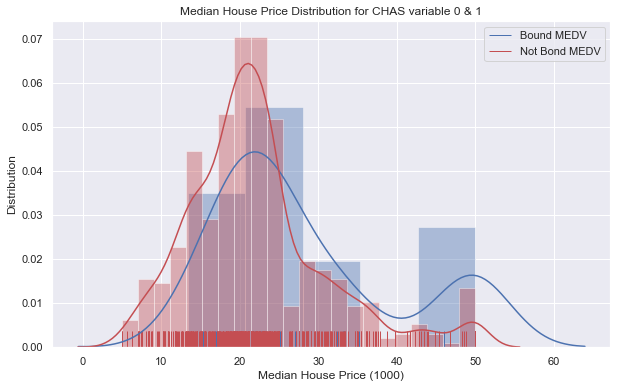

In [131]:
#Plots a distplot comparing the MEDV  values where CHAS is 0 and CHAS is 1
boundFig = sns.distplot(boundMEDV, hist=True, rug=True, color='b')
notBoundFig = sns.distplot(notBoundMEDV, hist=True, rug=True, color='r')
plt.title("Median House Price Distribution for CHAS variable 0 & 1")
plt.legend(['Bound MEDV', 'Not Bond MEDV'], loc="upper right")
plt.ylabel("Distribution")
plt.xlabel("Median House Price (1000)")

plt.show()

The above dist plot allows for visualisation of the above determination that the mean value distribution of both datasets, bound and not bound, are similar in values.

However, it also shows the distribution of the larger number of outliers between the 44,000 and 50,000 dollar range for the houses where the CHAS variable was 1, and therefore bound. Due to the mean comparison earlier it does not appear that the median house price is greatly impacted by the CHAS attribute in this dataset, therefore, this large number of outliers would be assumed to be due to a relationship the MEDV value has with other attributes in the dataset

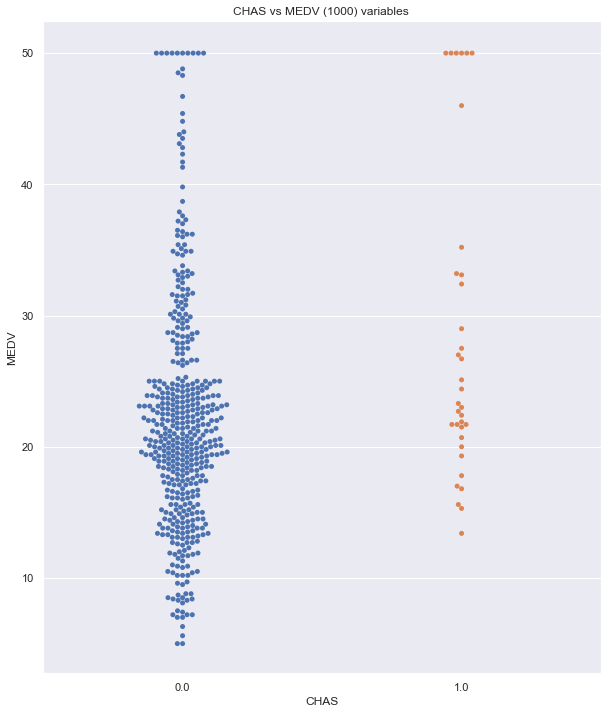

In [140]:
#Plots a swarmplot to comparing the MEDV distribution of values where CHAS is 0 and CHAS is 1
sns.swarmplot(x="CHAS", y="MEDV", data=df)
plt.title("CHAS vs MEDV (1000) variables ")
plt.show()

The swarmplot is also indicative of the points highlighted in the displot previously.
The means for the MEDV variable whether the CHAS variable is 1 or 0 appears centred around the same points. Which is also visualised in the below box plot. However, utilizing this view also allows for the visualisation of the variety of outlier values contained in the dataframes.

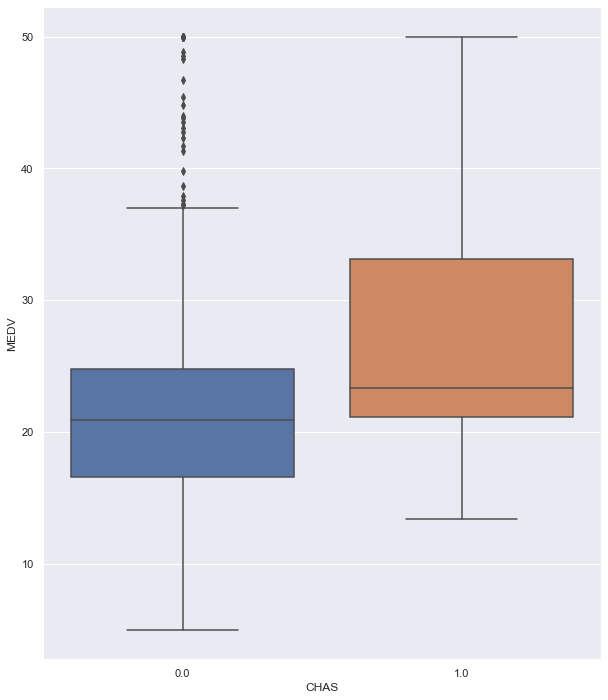

In [139]:
#Plots a boxplot to comparing the MEDV distribution of values where CHAS is 0 and CHAS is 1
sns.set(rc={'figure.figsize':{10,12}})
sns.boxplot(x="CHAS", y="MEDV", data=df)
plt.show()

In [133]:
# Shapiro-Wilk Test
# Tests if the data same has a Gaussian distribution or not
# Reference : [6]

stat, p = shapiro(boundMEDV)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian for CHAS=1')
else:
    print('Probably not Gaussian for CHAS=1')
    
stat, p = shapiro(notBoundMEDV)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian for CHAS=0')
else:
    print('Probably not Gaussian for CHAS=0')

stat=0.836, p=0.000
Probably not Gaussian for CHAS=1
stat=0.928, p=0.000
Probably not Gaussian for CHAS=0


The Shapiro-Wilk test uses the following assumptions and interpretations:

    - Interpretation
        - H0: the sample has a Gaussian distribution.
        - H1: the sample does not have a Gaussian distribution.

    - Assumptions
        - Observations in each sample are independent and identically distributed.

As the results state the Shapiro-Wilk test appears to confirm that neither of the MEDV dataframes are Gaussian in shape.

However, visually when combined the MEDV values do appear to be relatively normal in distribution.

_[6]_

In [45]:
#Chi-Squared Test
# Reference - [6]

stat, p, dof, expected = chi2_contingency(boundMEDV, notBoundMEDV)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.000, p=1.000
Probably independent


The Chi-squared test uses the following assumptions and interpretations to test whether two variables are related or independent:

Assumptions:
    - Observations used in the calculation of the contingency table are independent.
    - 25 or more examples in each cell of the contingency table.

Interpretation
    - H0: the two samples are independent.
    - H1: there is a dependency between the samples.
    
The Chi-Squared analysis confirms that the MEDV and CHAS attributes appear to be independent of each other due to the p value being greater than 0.05, 1. This also appears to confirm the determination that the CHAS variable does not appear to have much impact on the MEDV values in this dataset, even though the original study was to investigate the demand for clear air in the Boston area and the affect on house prices/willingness of people to pay additional funds for clean air. _[7]_


## Keras Neural Network

The objective of this section is to create a neural network that can predict the median house price based on the other dataset variables

Stores the variables, excluding the MEDV column data, in to an inputs variable for feeding in to the neural network later

In [46]:
inputs = df.loc[:, df.columns != 'MEDV']
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Stores the dataset MEDV values in an outputs variable for working through the neural network

In [47]:
outputs = df[['MEDV']]
outputs

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [50]:
#Whitens data
# Reference - [8]

pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
inputsWhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
inputsWhite 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.789154,0.073129,-0.733316,-0.349447,-0.068129,0.027581,0.942339,0.108110,1.608370,-1.555624,-0.638012,-0.258742,1.083075
502,-0.793743,0.013147,-0.936627,-0.053825,-0.127177,-0.216900,0.946965,0.140667,1.715690,-1.508870,0.471572,-0.268371,0.831583
503,-0.787386,0.011866,-1.303356,0.494394,-0.335579,-1.104183,1.171877,0.195967,2.005277,-1.241822,-0.589854,-0.426902,0.779639
504,-0.782367,0.053780,-1.258023,0.429652,-0.297891,-0.930280,1.104906,0.202194,1.984588,-1.094030,-0.384357,-0.389392,0.816168


Whitening the data -

The pre-processing was utilised in an attempt to increase the performance of the keras neural network to predict the median house prices based on the other variables provided. 

Numerous tests were completed in order to train the network to a greater accuracy and utilising this pre-processing allowed for me to decrease the loss value during this analysis. Alternate tests completed in order to train the neural network can be seen in the Github repo for this analysis. 

_[9]_

In [53]:
#Splits the dataset in to train and test for inputs and outputs
x_train, x_test, y_train, y_test = mod.train_test_split(inputsWhite, outputs, test_size=0.5)

In [54]:
# Applies a scale to both the inputs train and test sets defined in the previous cell
scaler = pre.StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Prints the scaled inputs trained values to ensure they are calculating correctly
print(x_train_scaled[0])

[ 1.53245603 -1.47703887 -0.00993666  0.08822934 -2.02840516  1.6497328
  3.46641756  3.57408709  0.76236105 -0.10959705 -0.14256949 -0.02984998
 -1.27360761]


Scaling of the dataset was completed as a method of standardising the data within the dataset in order to 

In datasets where the values of the variables typically vary from high to low it can affect the ability of the neural network to predict the values.
Neural networks originally depend on a situation where the weights and bias' are randomly initialised. In order to reduce the error in datasets where the ranges for variables where larger values tend to affect the neural network scaling is completed to remove the mean and scale to unit variance. In some cases if the data hasn't been scaled if can affect some estimators if the data does not appear relatively normal. In the case of the Boston housing data and as we mentioned previously, a number of the attibutes did not have a normal distribution and therefore scaling was completed to improve the neural network predicating ability.

A number of tests of the neural network for predicting the median house price were also completed without the scaling but this did not have much impact on increasing the accuracy in this case.

In [56]:
#Creates the neural network and builds the appropriate layers
model = models.Sequential()

# Hidden layer with 13 neurons and an input layer 13
model.add(layers.Dense(13, activation='relu', input_dim=13))
model.add(layers.Dense(26, activation='relu'))
#model.add(layers.Dense(26, activation='linear'))
# Single output layer for MEDV prediction
model.add(layers.Dense(1, activation='relu'))

# RMSprop optimizer increases learning rate of the neural network
# Mean absolute error and acc includes the mean_absolute error in the metrics for later evaluation of the neural network
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error', 'acc'])

In [87]:
# Trains the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 202 samples, validate on 51 samples
Epoch 1/100
202/202 [==============================] - 0s 39us/step - loss: 1.7800 - mean_absolute_error: 1.0639 - acc: 0.0297 - val_loss: 13.2032 - val_mean_absolute_error: 2.9649 - val_acc: 0.0196
Epoch 2/100
202/202 [==============================] - 0s 30us/step - loss: 1.8530 - mean_absolute_error: 1.0810 - acc: 0.0396 - val_loss: 12.3790 - val_mean_absolute_error: 2.7895 - val_acc: 0.0196
Epoch 3/100
202/202 [==============================] - 0s 30us/step - loss: 1.7627 - mean_absolute_error: 1.0548 - acc: 0.0396 - val_loss: 12.3439 - val_mean_absolute_error: 2.7885 - val_acc: 0.0196
Epoch 4/100
202/202 [==============================] - 0s 30us/step - loss: 1.7592 - mean_absolute_error: 1.0583 - acc: 0.0446 - val_loss: 12.4303 - val_mean_absolute_error: 2.8153 - val_acc: 0.0196
Epoch 5/100
202/202 [==============================] - 0s 30us/step - loss: 1.7448 - mean_absolute_error: 1.0471 - acc: 0.0446 - val_loss: 12.0405 - val_mean_a

In [88]:
# Evaluates the Mean Squared Error, Mean Absolute Error and Accuracy metric values
model.evaluate(x_test_scaled, y_test)

253/253 [==============================] - 0s 12us/step


[23.557916437684312, 3.3259473534911987, 0.011857707495156956]

In [89]:
# Selects the first 2 values from the training data to make a prediction
to_predict = x_train_scaled[:2]
predictions = model.predict(to_predict)
# Prints the predicted values
print(predictions)

[[14.92592]
 [24.25475]]


In [90]:
# Prints the actual values from the first 2 values from the MEDV training output set for comparison
print(y_train[:2])

     MEDV
488  15.2
0    24.0


In [104]:
#Complete predictions
completePredictions = model.predict(x_train_scaled)

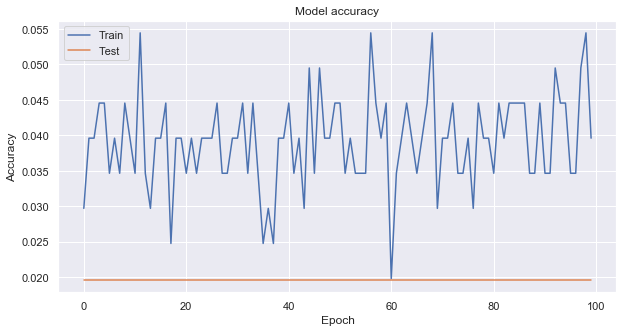

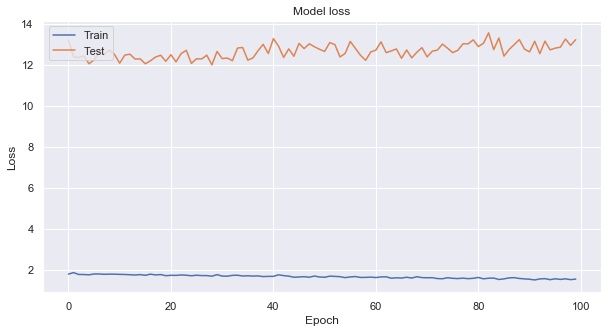

In [91]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Loss Values upon each training run of the model:

- 9.7478
- 6.2192
- 4.3797
- 2.9892
- 2.2919
- 1.7733
- 1.5354

In [105]:
# Comparison of the first 10 rows of data from predicted values and true values

original = df[['MEDV']]
print ("Original values were :\n", original[:10])

predicted = completePredictions
print ("Predicted values were :\n", completePredictions[:10])

Original values were :
    MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9
Predicted values were :
 [[14.925919]
 [24.25475 ]
 [26.850311]
 [35.048595]
 [20.44624 ]
 [14.643813]
 [25.072727]
 [18.355938]
 [18.392931]
 [18.941957]]


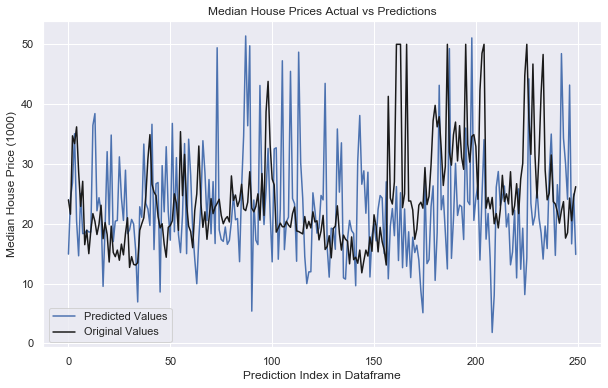

In [130]:
# Plot of Original vs Predicted values for comparison

#plt.plot(completePredictions, 'b-', label='Predicted Values')
#plt.plot(original, 'k-', label='Original Values')

plt.plot(completePredictions[:250], 'b-', label='Predicted Values')
plt.plot(original[:250], 'k-', label='Original Values')
plt.legend(['Predicted Values', 'Original Values'], loc="lower left")
plt.ylabel("Median House Price (1000)")
plt.xlabel("Prediction Index in Dataframe")
plt.title("Median House Prices Actual vs Predictions")
plt.show()

The mean absolute error achieved during this analysis was calculated to be - 3.3. This indicates we are approximately 3,300 dollars on average across the predictions from the actual values occuring within the training data set. This is significant as the house prices vary from 5,000 dollars to 50,000 dollars as reported earlier in the network.

From the graphs above, the accuracy still fluctuates throughout the epochs used in this training, therefore the model is not being overfitted and this would not have an impact on the analysis.
 
_[10]_

In the analysis completed by Francois Chollet in "Deep  Learning with Python" François Chollet, the testing on the boston housing dataset mean absolute error was able to be reduced to 2,550 dollars through the inclusion of validation logs at each fold and kfold analysis of the model created by Francois.

However, the accuracy also appeared to be an issue with this model created and across the testing of the keras neural networks completed reducing the attributes to 4 rather than 13, not applying both the scaling and whitening of the data all appeared to have very little impact on increasing the accuracy being achieved when predicting the median house prices. 

However, in further analysis batch normalisation, changing the learning rates and removal of the 50,000 MEDV values from the data are some possible methods which may assist in increasing this value for the predictions on both the test and training data. Other variables changed in testing the training of the neural network included changing the number of epochs used, the test sizes and the validation tests splits.

The above graph depicting the difference in the values predicted and known is also capped at 250 values as after this value the data became harder to visualise as the number of predicted values doesn't match the number of original values present from the data set.

The actual values and predicted values checked also displayed a wide variance between some of the values, such as the first which has a difference of 10,900 dollars which confirms the issue with  accuracy of the neural network previously mentioned in just one example, which would need to be improved upon under further analysis of the neural network. However, when the predicted values were plotted against the actual values before the variance in the values is noted by the graphing does not show a complete mis-match of the data to the trained values. Therefore, the model is performing somewhat well. Although it can be seen some of the predicted values go above the maximum 50,000 dollars value which shows the model does having some issues with handling unknown values in the prediction variables.

However, as Francois Chollet achieved a 2,550 dollars mean absolute error and in this case it resulted in 3,300 dollars, if the tweaks could be made to increase the accuracy in the case of this model it is a good starting point for improvment in order to predict the median house prices in future as it also achieves a minimal loss output of approximately 1.5.

### References

[1] Machine Learning and Statistics, Assessment 2019, Ian McLoughlin, Galway-Mayo Institute of Technology.

[2] Scikitlean Dataset loading
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_bostonS
    
[3] Creative Research Systems - Correlation
    https://www.surveysystem.com/correlation.htm
    
[4] Hypothesis testing in Machine Learning using Python
    https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
[5] Scipy stats ttest
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
    
[6] Statistical Hypothese Tests in Python
    https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ 
    
[7] Hedonic housing prices and the demand for clean air    https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air

[8] Whitening the Iris data lecture 2019, Ian McLoughlin, Galway-Mayo Institute of Technology

[9] Preprocessing data sets lecture 2019, Ian McLoughlin, Galway-Mayo Institute of Technology

[10] Deep Learning with Python, François Chollet